In [1]:
# Name=Dudhe Pooja 
# PRN=2301208032


### Step 1: Problem Statement:

##### Objective: To predict future sales for a given store and item based on historical sales data. Accurate demand forecasting helps businesses in inventory management, resource allocation, and overall sales strategy. 
##### Aim: To build a forecasting model using ARIMA to predict sales for the next 30 days, based on the provided historical sales data.


### Information


1) Date:The date of the sales record.
2) store: Unique identifier for each store.
3) item: Unique identifier for each item sold.
4) sales: Total sales amount for the item in the store on that date.


### Step 2: Import Necessary Libraries

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

#### Step 3: Load the Dataset


In [22]:
data = pd.read_csv('dataset_DF_data.csv', parse_dates=['date'])
data.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


#### Step 4: Initial Data Exploration


In [24]:
print(data.head())
print(data.info())

        date  store  item  sales
0 2013-01-01      1     1     13
1 2013-01-02      1     1     11
2 2013-01-03      1     1     14
3 2013-01-04      1     1     13
4 2013-01-05      1     1     10
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    913000 non-null  datetime64[ns]
 1   store   913000 non-null  int64         
 2   item    913000 non-null  int64         
 3   sales   913000 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 27.9 MB
None


### Step 4: Data Preprocessing


In [27]:
data['date'] = pd.to_datetime(data['date'])

In [29]:
# Aggregate sales by date

df_daily_sales = data.groupby('date').sum().reset_index()


In [30]:
# Set 'date' as index

df_daily_sales.set_index('date', inplace=True)

#### Step 5: Data Visualization


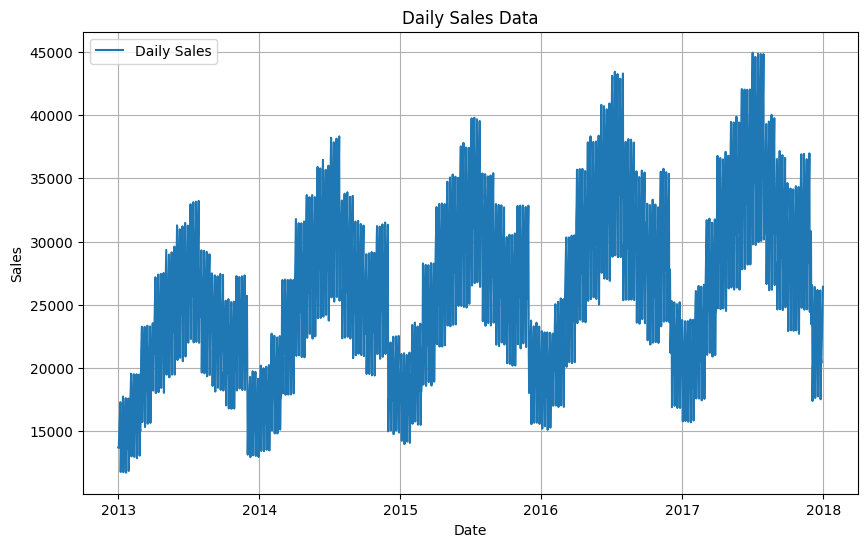

In [31]:
plt.figure(figsize=(10, 6))
plt.plot(df_daily_sales['sales'], label='Daily Sales')
plt.title('Daily Sales Data')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

### Step 5: Model Selection and Fitting


In [32]:
model = ARIMA(df_daily_sales['sales'], order=(10, 1, 0))  # Using ARIMA(10,1,0) for simplicity
model_fit = model.fit()

C:\Users\user5\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user5\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user5\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user5\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCac

### Step 6: Forecasting


In [33]:
forecast = model_fit.forecast(steps=30)

### Step 7: Visualization of Forecast


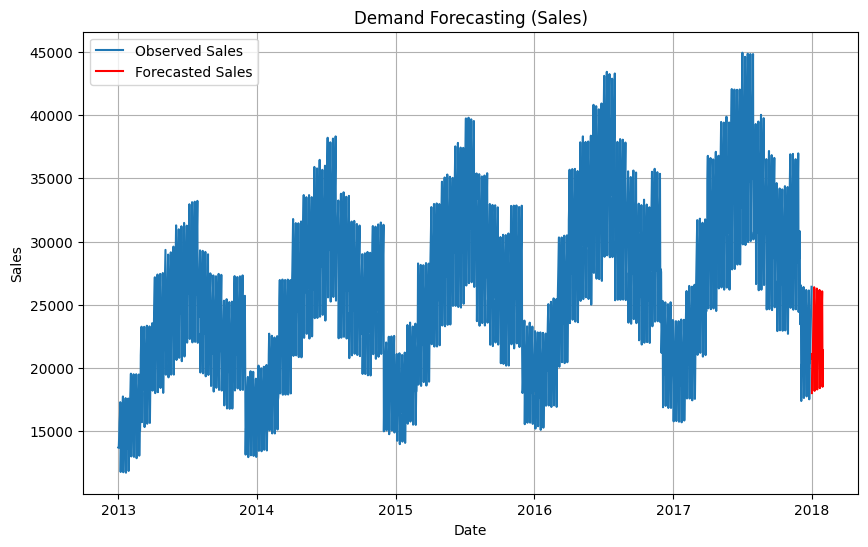

In [34]:
plt.figure(figsize=(10, 6))
plt.plot(df_daily_sales['sales'], label='Observed Sales')
plt.plot(forecast, label='Forecasted Sales', color='red')
plt.title('Demand Forecasting (Sales)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

### Step 8: Interpretation


In [35]:
print(forecast)

2018-01-01    18009.958371
2018-01-02    21122.098546
2018-01-03    20702.525979
2018-01-04    22123.009427
2018-01-05    23648.843337
2018-01-06    24997.748172
2018-01-07    26384.961045
2018-01-08    18181.996496
2018-01-09    21220.891286
2018-01-10    20793.082007
2018-01-11    22177.875478
2018-01-12    23625.524609
2018-01-13    24908.053413
2018-01-14    26277.649869
2018-01-15    18296.118430
2018-01-16    21277.954108
2018-01-17    20853.053930
2018-01-18    22210.868716
2018-01-19    23589.141736
2018-01-20    24812.023625
2018-01-21    26166.835170
2018-01-22    18402.643264
2018-01-23    21329.645949
2018-01-24    20908.526368
2018-01-25    22240.573952
2018-01-26    23552.768017
2018-01-27    24718.770390
2018-01-28    26058.895273
2018-01-29    18506.178423
2018-01-30    21379.206774
Freq: D, Name: predicted_mean, dtype: float64


### Step 8: Conclusion


Conclusion: The dataset provides essential sales information that enables effective demand forecasting, aiding in inventory management and strategic planning.